In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
from datetime import datetime, timedelta
import os

# python add-ons
import numpy as np
import pandas as pd
try:
    import netCDF4
    from netCDF4 import num2date
except ImportError:
    print('We suggest you install netCDF4 using conda rerun this cell')

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

from pvlib.forecast import *

In [3]:
start = datetime.utcnow() # today's date
end = start + timedelta(days=7) # 7 days from today
timerange = [start, end]

coordinates = [-110.9, 32.2] # Tucson, AZ

In [3]:
fm = GFS()

In [4]:
data = fm.get_query_data(coordinates,timerange)

In [5]:
time_vals = fm.time

In [6]:
var_name = 'temperature_iso'

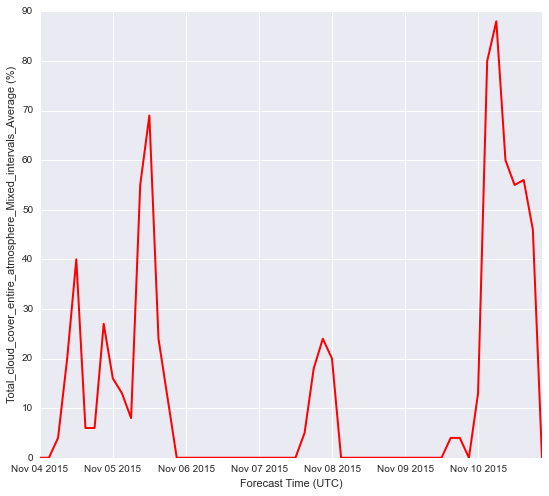

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.plot(time_vals, data[var_name], 'r', linewidth=2)
ax.set_ylabel(fm.var_stdnames[var_name] + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')

In [23]:
var_name = 'total_clouds'

In [24]:
total_cloud_cover = data[var_name]

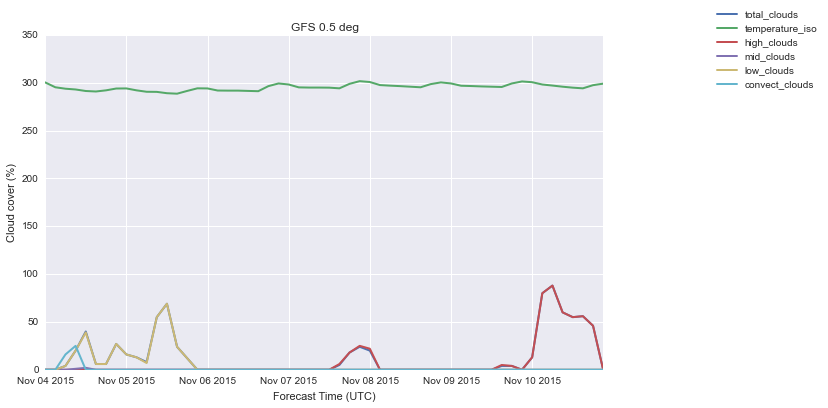

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_ylabel('Cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.set_title('GFS 0.5 deg')
for varname in fm.variables[1:]:
    ax.plot(time_vals, data[varname], linewidth=2, label=varname)
ax.legend(bbox_to_anchor=(1.4,1.1))    

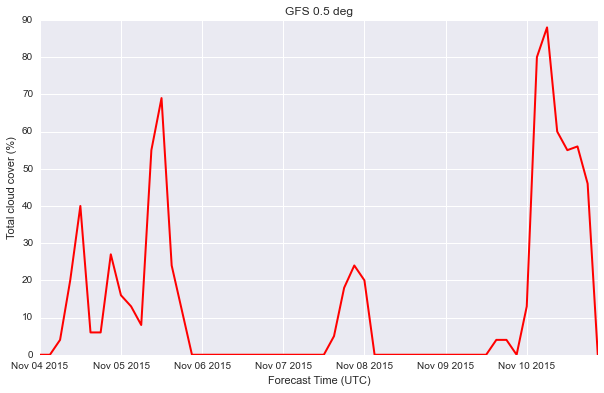

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(time_vals, total_cloud_cover, 'r', linewidth=2)
ax.set_ylabel('Total cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.set_title('GFS 0.5 deg')

In [4]:
fm = NAM()

In [5]:
data = fm.get_query_data(coordinates,timerange)

In [6]:
time_vals = fm.time

In [7]:
cloud_vars = fm.variables[3:]

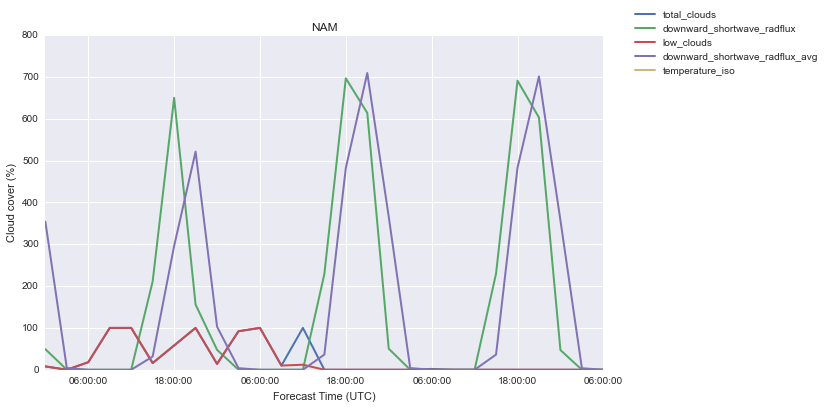

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname], linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))
ax.set_title('NAM')

In [11]:
ghis = fm.variables[:2]

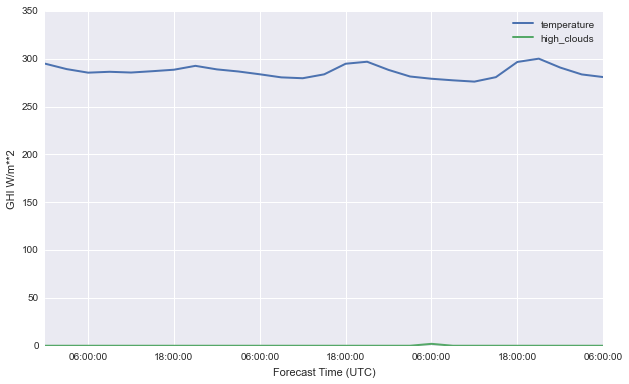

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in ghis:
    ax.plot(time_vals, data[varname], linewidth=2, label=varname)
ax.set_ylabel('GHI W/m**2')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend()

In [13]:
fm = NDFD()

In [14]:
data = fm.get_query_data([-110.9,32.2],[start,end])

In [15]:
time_vals = fm.time

In [20]:
total_cloud_cover = data['total_clouds']
temp = data['temperature']
wind = data['wind_speed']

(0, 100)

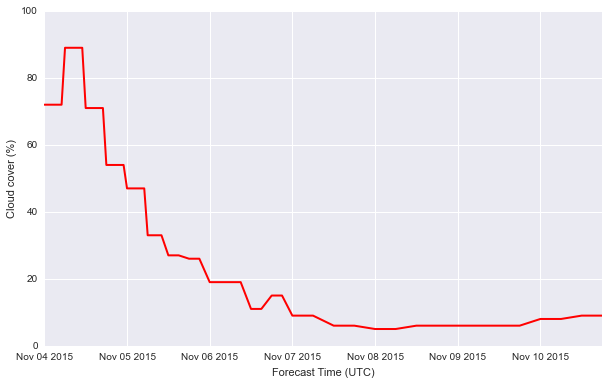

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(time_vals, total_cloud_cover, 'r', linewidth=2)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
plt.ylim(0,100)

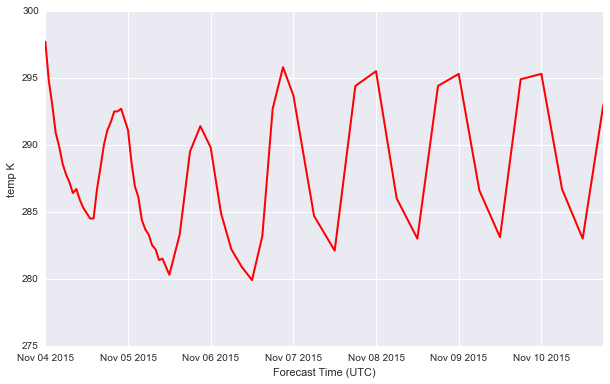

In [22]:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(time_vals, temp, 'r', linewidth=2)
    ax.set_ylabel('temp {}'.format(fm.var_units['temperature']))
    ax.set_xlabel('Forecast Time (UTC)')

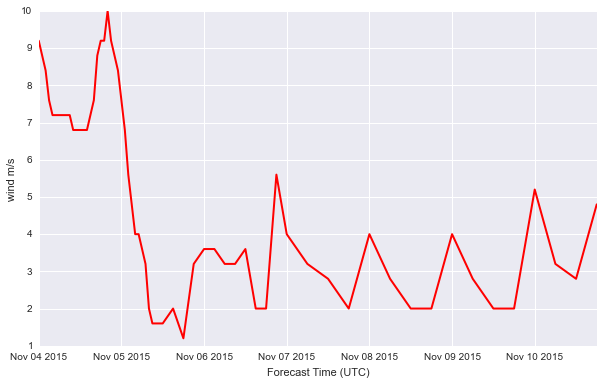

In [23]:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(time_vals, wind, 'r', linewidth=2)
    ax.set_ylabel('wind {}'.format(fm.var_units['wind_speed']))
    ax.set_xlabel('Forecast Time (UTC)')

In [33]:
fm = RAP()

In [34]:
data = fm.get_query_data([-110.9,32.2],[start,end])

In [35]:
time_vals = fm.time

In [44]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

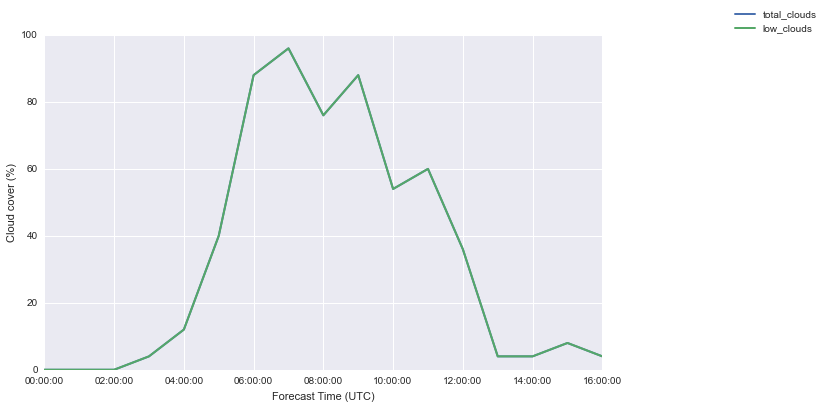

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname][:].squeeze(), linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))

In [73]:
fm = GSD()

NameError: name 'GSD' is not defined

In [47]:
data = fm.get_query_data([-110.9,32.2],[start,end])

In [48]:
time_vals = fm.time

In [54]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [55]:
var_name = 'downward_shortwave_radflux'

In [56]:
ghi = data[var_name]

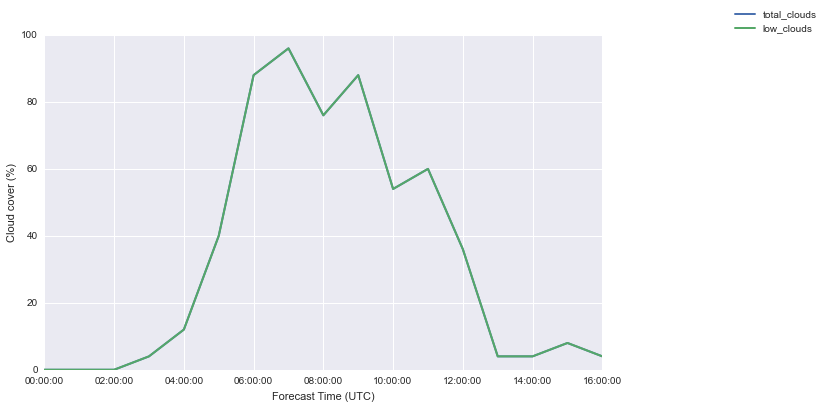

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname][:].squeeze(), linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))

AttributeError: 'Series' object has no attribute 'find'

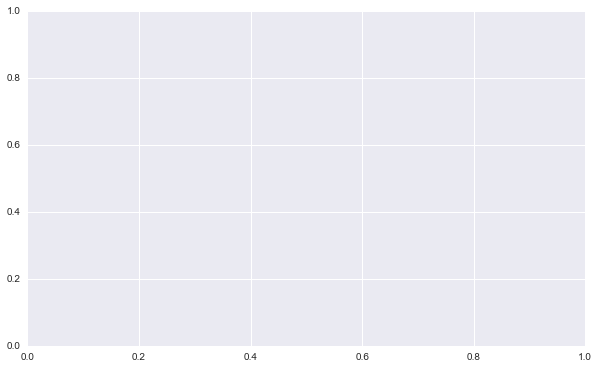

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(time_vals, ghi[:].squeeze(), linewidth=2)
ax.set_ylabel('GHI' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')

In [62]:
fm = NCEP()

In [63]:
data = fm.get_query_data([-110.9,32.2],[start,end])

In [64]:
time_vals = fm.time

In [65]:
cloud_vars = fm.variables[3:]

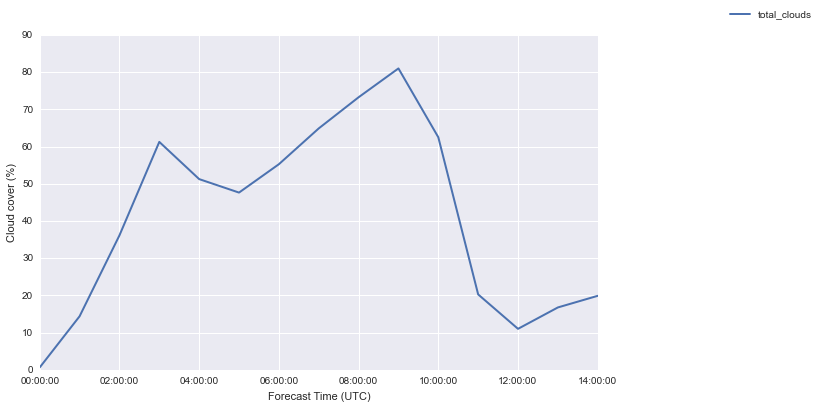

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname][:].squeeze(), linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))